# ML Murder Mystery Game
A game to train ML skills in a murder mystery setting. Each of 24 players (4 teams of 6) is assigned 3 pieces of evidence from a pool of 25. Each player is eliminated by one method, and teams use ML models to predict the cause of death.

In [6]:
import random
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
import networkx as nx
import matplotlib.pyplot as plt
%matplotlib inline

# Game data
evidence_list = [f'Evidence_{i+1}' for i in range(25)]  # 25 pieces of evidence
kill_methods = ['Shot', 'Poisoned', 'Stabbed', 'Strangled', 'Blunt Force', 'Drowned', 'Electrocuted', 'Burned', 'Pushed', 'Other']
death_causes = ['Revenge', 'Accident', 'Jealousy', 'Greed', 'Self-Defense']
teams = [f'Team_{i+1}' for i in range(4)]
players = [[f'Player_{i*6+j+1}' for j in range(6)] for i in range(4)]

# Assign evidence and kill method to each player
player_data = {}
for team_idx, team in enumerate(players):
    for player in team:
        player_data[player] = {
            'evidence': random.sample(evidence_list, 3),
            'kill_method': random.choice(kill_methods),
            'team': teams[team_idx]
        }

# Ground truth for death cause
true_cause = random.choice(death_causes)
print(f'True Cause of Death: {true_cause}')

True Cause of Death: Self-Defense


## Training ML Models for Each Team
Each team trains a Decision Tree model to predict the cause of death based on evidence and kill methods.

In [2]:
def train_team_model(team_players, evidence_list, kill_methods, death_causes):
    X = []
    y = []
    for _ in range(100):  # Simulate 100 data points for training
        evidence_subset = random.sample(evidence_list, random.randint(1, 5))
        kill_method = random.choice(kill_methods)
        cause = random.choice(death_causes)
        feature_vector = [1 if e in evidence_subset else 0 for e in evidence_list] + [kill_methods.index(kill_method)]
        X.append(feature_vector)
        y.append(death_causes.index(cause))
    
    model = DecisionTreeClassifier()
    model.fit(X, y)
    return model

# Train models for each team
team_models = {}
for team in teams:
    team_players = [p for p in player_data if player_data[p]['team'] == team]
    team_models[team] = train_team_model(team_players, evidence_list, kill_methods, death_causes)

## Team Predictions
Each team uses its model to predict the cause of death based on aggregated evidence and a representative kill method.

In [3]:
for team in team_models:
    team_players = [p for p in player_data if player_data[p]['team'] == team]
    evidence_subset = []
    kill_methods_team = []
    for player in team_players:
        evidence_subset.extend(player_data[player]['evidence'])
        kill_methods_team.append(player_data[player]['kill_method'])
    evidence_subset = list(set(evidence_subset))[:5]  # Limit to 5 unique evidence
    feature_vector = [1 if e in evidence_subset else 0 for e in evidence_list] + [kill_methods.index(kill_methods_team[0])]
    prediction = death_causes[team_models[team].predict([feature_vector])[0]]
    print(f'{team} predicts: {prediction}')

Team_1 predicts: Accident
Team_2 predicts: Jealousy
Team_3 predicts: Revenge
Team_4 predicts: Revenge


## Visualizing Evidence Relationships
Create a graph to show connections between evidence pieces based on player assignments.

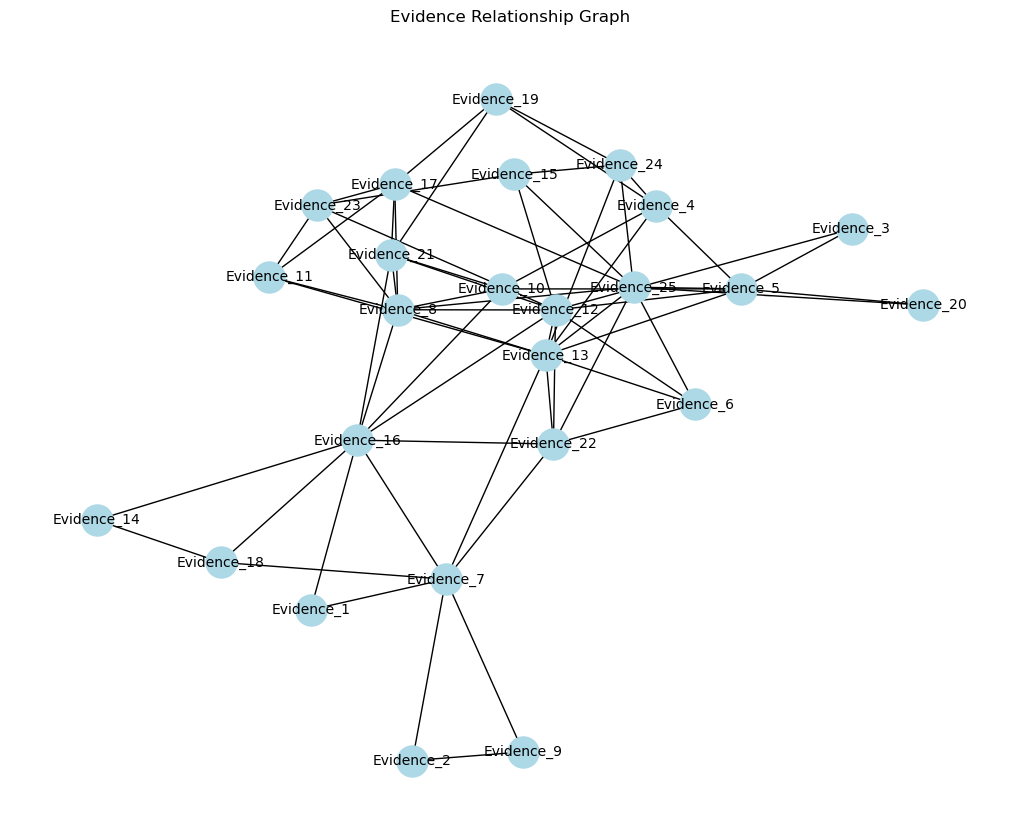

In [4]:
def create_evidence_graph(player_data, evidence_list):
    G = nx.Graph()
    for evidence in evidence_list:
        G.add_node(evidence)
    for player in player_data:
        for i, e1 in enumerate(player_data[player]['evidence']):
            for e2 in player_data[player]['evidence'][i+1:]:
                G.add_edge(e1, e2)
    return G

# Plot the evidence graph
evidence_graph = create_evidence_graph(player_data, evidence_list)
plt.figure(figsize=(10, 8))
nx.draw(evidence_graph, with_labels=True, node_color='lightblue', font_size=10, node_size=500)
plt.title('Evidence Relationship Graph')
plt.show()

## Future Extensions
1. **Competition Mode**: Add scoring based on prediction accuracy and evidence efficiency.
2. **Advanced Models**: Use Random Forest or Graph Neural Networks for better predictions.
3. **Gameplay Enhancements**: Introduce fake evidence or special roles (e.g., detective).
4. **Real-World Applications**: Use for ML training or investigative case studies.
5. **Scalability**: Increase players, evidence, or add online multiplayer.